# **Import required packages**

In [0]:
from keras.models import load_model
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
from sklearn.externals import joblib
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils import plot_model
from keras.optimizers import Adam, SGD, RMSprop 
from keras import backend
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import string
import matplotlib.pyplot as plt
import operator
from PIL import Image, ImageDraw

import warnings
warnings.filterwarnings('ignore')


# **Create a dictionary to decode label-> character**

In [0]:
model = tf.keras.models.load_model("letters_model.h5")
symbols =string.ascii_uppercase 
mon_dictionnaire = {}

for i in range(len(symbols)):
    mon_dictionnaire[i]=symbols[i]

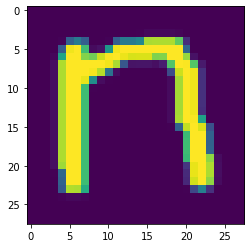

PREDICTED LETTER: N


In [7]:
link='letter1.png'
def best5(image):
    test=(model.predict(image))
    prediction = {}
    for i,j in enumerate(symbols):
        prediction[j]=test[0][i]
    return sorted(prediction.items(), key=operator.itemgetter(1),reverse=True)[:5]


image = cv2.imread(link)
   
height, width, depth = image.shape
#resizing the image to find spaces better
image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)
#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
#dilation
kernel = np.ones((5,5), np.uint8)
#img_dilation=cv2.erode(image,kernel,iterations=1)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
#adding GaussianBlur
gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)
#find contours
ctrs, hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
caracaters= list()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
prediction = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
  # Get bounding box
  x, y, w, h = cv2.boundingRect(ctr)
  cv2.rectangle(dp,(x-30,y-30),( x + w + 30, y + h + 30 ),(90,0,255),9)
for i, ctr in enumerate(sorted_ctrs):
  # Get bounding box
  x, y, w, h = cv2.boundingRect(ctr)
  temp = image[y-30:y+h+30, x-30:x+w+30]
temp = cv2.resize(temp, dsize=(28,28), interpolation=cv2.INTER_AREA)
temp = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)/255
temp = np.array(temp)
t = np.copy(temp)
t = 1-t
plt.imshow(t)
plt.show()
t = t.reshape(1,28,28,1)
top5=best5(t)
caracaters.append(t)
prediction.append(model.predict_classes(t))
predword = list()
if len(prediction)>1:
    fig, ax = plt.subplots(1, len(prediction))
    for i, axi in enumerate(ax.flat):
        predword.append(mon_dictionnaire[prediction[i][0]])
        axi.imshow(caracaters[i].squeeze())
        axi.set(xticks=[], yticks=[],xlabel=mon_dictionnaire[prediction[i][0]])
else:
    predword.append(mon_dictionnaire[prediction[0][0]])
predword = ''.join(predword)
print('PREDICTED LETTER: '+predword)


# **Visualise Data**

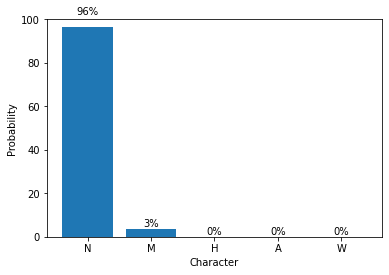

In [8]:
let = [x[0] for x in top5]
prob = [x[1]*100 for x in top5]
#print(let,prob)
bars=plt.bar(let,prob)
plt.ylim(0,100)
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height) + '%',ha='center', va='bottom')
plt.xlabel('Character')
plt.ylabel('Probability')
plt.show()

# If your uploaded images are transparents, you should add a background


In [0]:
img = Image.open('letter1.png')
img = img.convert("RGBA")
datas = img.getdata()
newData = []
for item in datas:
    if item[0] == 0 and item[1] == 0 and item[2] == 0:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)
img.putdata(newData)
